## Building a Convolutional Neural Network on CIFAR 10 Dataset

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

The Challenge here for the model is extreme low resolutions of the images

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

import tensorflow as tf

In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


### Load the dataset

In [3]:
# We will load the dataset from tensorflow keras datasets

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Lets check the shape of the respective sets
print(f"Shape of the Training features: {X_train.shape}")
print(f"Shape of the Testing features: {X_test.shape}")
print(f"Shape of the Training labels: {y_train.shape}")
print(f"Shape of the Testing labels: {y_test.shape}")

Shape of the Training features: (50000, 32, 32, 3)
Shape of the Testing features: (10000, 32, 32, 3)
Shape of the Training labels: (50000, 1)
Shape of the Testing labels: (10000, 1)


### Data Visualizations

[2]


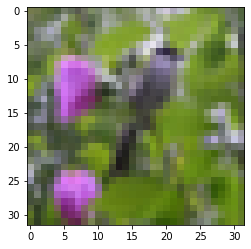

In [4]:
# Lets do some data visualizations

i=300
plt.imshow(X_train[i])
print(y_train[i])

C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


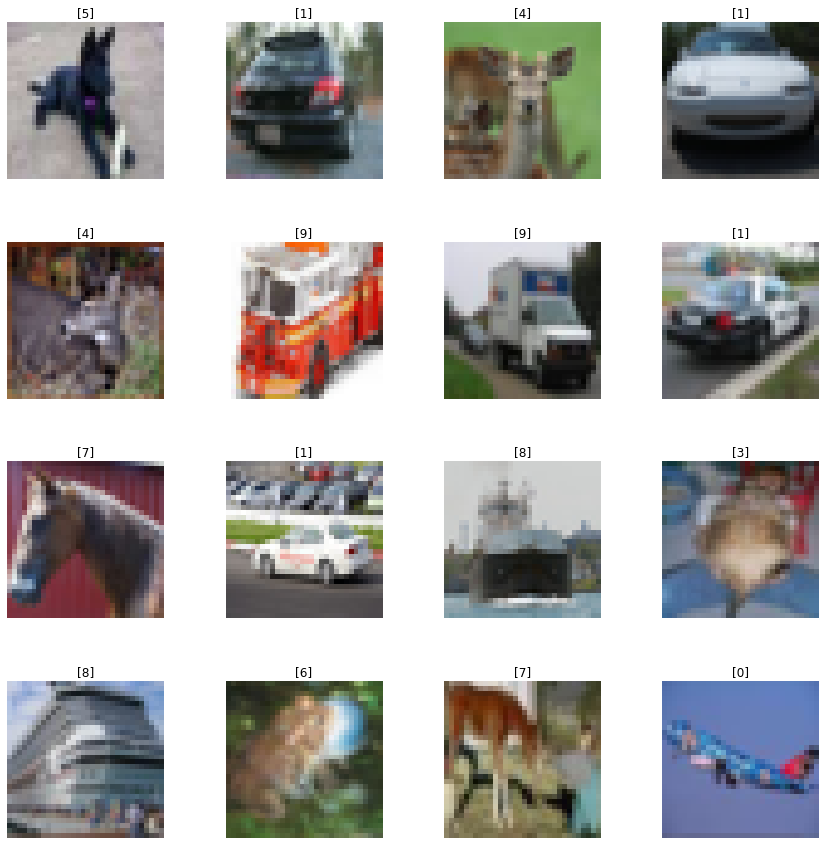

In [5]:
# Lets view some 16 images

W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

### Data Preparation

In [6]:
# we will need to convert the datatypes of the training, testing features to float32

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# Normalize the training and test features
X_train = X_train/255
X_test = X_test/255

In [8]:
# In order to use categorical cross entropy we need to convert all labels to categorical by giving num_classes of categories
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
# Check the training feature
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [10]:
# Check the training labels
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Build and Train the Model

In [11]:
# Build the model

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu, input_shape=X_train.shape[1:]))
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Dense(1024, activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

# Compile the model
cnn.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
            optimizers=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
            metrics=['accuracy'])

# Model Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [12]:
# Train the model

cnn.fit(X_train, y_train, batch_size=512, epochs=100)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 97us/sample - loss: 2.1362 - accuracy: 0.2161
Epoch 2/100
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7285 - accuracy: 0.3743
Epoch 3/100
50000/50000 [==============================] - 2s 38us/sample - loss: 1.5314 - accuracy: 0.4534
Epoch 4/100
50000/50000 [==============================] - 2s 39us/sample - loss: 1.3736 - accuracy: 0.5129
Epoch 5/100
50000/50000 [==============================] - 2s 38us/sample - loss: 1.2587 - accuracy: 0.5539
Epoch 6/100
50000/50000 [==============================] - 2s 39us/sample - loss: 1.1714 - accuracy: 0.5877
Epoch 7/100
50000/50000 [==============================] - 2s 39us/sample - loss: 1.0880 - accuracy: 0.6147
Epoch 8/100
50000/50000 [==============================] - 2s 39us/sample - loss: 1.0095 - accuracy: 0.6449
Epoch 9/100
50000/50000 [==============================] - 2s 39us/sample - loss: 0.9433 - accuracy: 0.6697
Epoch

50000/50000 [==============================] - 2s 39us/sample - loss: 0.1536 - accuracy: 0.9502s - loss: 0.1520 - ac
Epoch 77/100
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1451 - accuracy: 0.9523
Epoch 78/100
50000/50000 [==============================] - 2s 38us/sample - loss: 0.1526 - accuracy: 0.9499
Epoch 79/100
50000/50000 [==============================] - 2s 38us/sample - loss: 0.1514 - accuracy: 0.9504
Epoch 80/100
50000/50000 [==============================] - 2s 38us/sample - loss: 0.1464 - accuracy: 0.9522
Epoch 81/100
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1465 - accuracy: 0.9519
Epoch 82/100
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1463 - accuracy: 0.9526
Epoch 83/100
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1429 - accuracy: 0.9538
Epoch 84/100
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1429 - accuracy: 0.9539
Epoch 85/10

### Model Evaluation

In [13]:
# Run the accuracy on the overall test features
score = cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy : {score[1]}")

Test Accuracy : 0.7960000038146973


Text(0.5, 1.0, 'Training Accuracy')

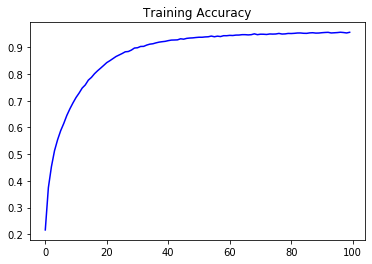

In [15]:
# We will now plot the training accuracy 

epochs = range(len(cnn.history.history['accuracy']))
plt.plot(epochs, cnn.history.history['accuracy'], 'b', Label='Training Accuracy')
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Training Loss')

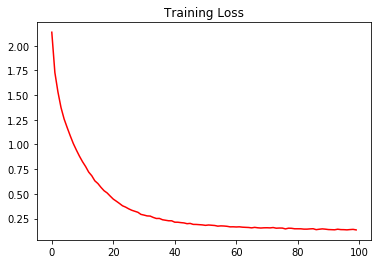

In [16]:
# We will now plot the training Loss 

plt.plot(epochs, cnn.history.history['loss'], 'r', Label='Training Loss')
plt.title("Training Loss")

In [17]:
# Now we will run prediction of classes
predicted_classes = cnn.predict_classes(X_test)

In [20]:
# Now converting back to labels from the categories matrix
y_test = y_test.argmax(axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

Print the Confusion Matrix
[[809  20  26  15  12   8   8  13  50  39]
 [  4 906   1   2   3   4   9   2  17  52]
 [ 44   7 653  59  77  63  45  32  12   8]
 [ 22   4  40 589  52 165  59  35  17  17]
 [ 10   3  39  52 766  37  33  45  11   4]
 [  3   4  16 136  45 733  19  35   6   3]
 [  4   1  17  33  26  17 891   5   4   2]
 [  6   3   8  27  45  57   6 833   1  14]
 [ 38  23   8  10   5   4   6   2 885  19]
 [ 12  41   3   1   5   4  11  10  18 895]]


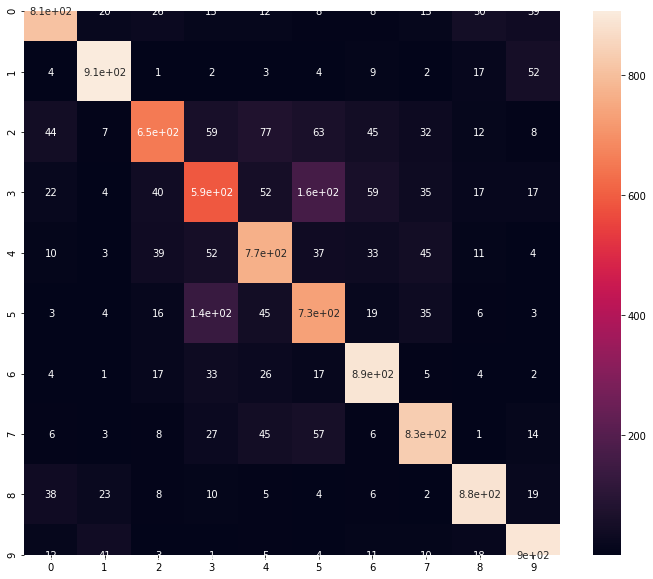

In [22]:
# Build and visualize the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True)

print("Print the Confusion Matrix")
print(cm)

In [24]:
# Print the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.90      0.91      0.90      1000
           2       0.81      0.65      0.72      1000
           3       0.64      0.59      0.61      1000
           4       0.74      0.77      0.75      1000
           5       0.67      0.73      0.70      1000
           6       0.82      0.89      0.85      1000
           7       0.82      0.83      0.83      1000
           8       0.87      0.89      0.88      1000
           9       0.85      0.90      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000



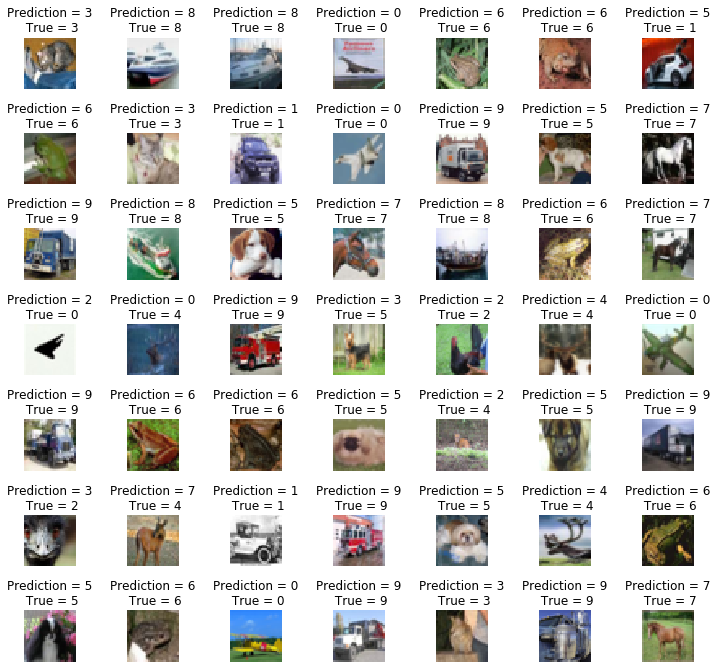

In [23]:
# Lets visualize around 50 images with their predictions

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    